<a href="https://colab.research.google.com/github/asia281/dnn2022/blob/main/Asia_of_Bootcamp_ML_Exam_1_student_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taylor series of cosine function is given as

$$\cos(x) = \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}x^{2n}$$

Let us define truncated Taylor series of cosine function as

$$T_N(x) = \sum_{n=0}^N \frac{(-1)^n}{(2n)!}x^{2n}$$

You are to:
1. Calculate values of $T_N(x)$ for provided values of $x$ (`x_values`) and $N$ (`n_cutoffs`).
2. Calculate maximum error value $|cos(x) - T_N(x)|$ attained for calculated values for $x\in[-\pi, \pi]$.

You may only use vectorized operations for algebraic computation. To calcluate $n!$ use the `factorial` function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

factorial = np.vectorize(np.math.factorial)

2.8361161842805354


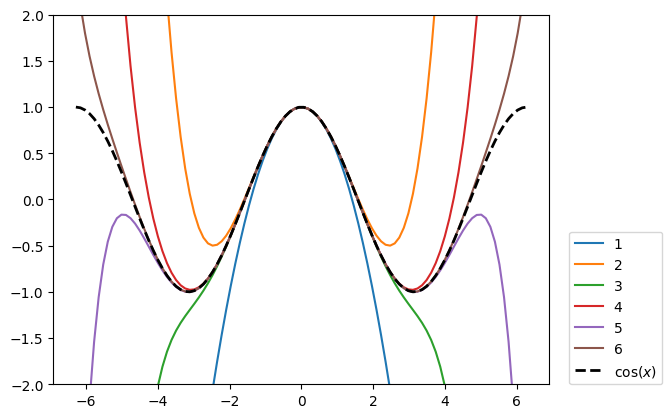

In [42]:
x_values = np.linspace(-2*np.pi, 2*np.pi, 100)
n_cutoffs = np.array([1, 2, 3, 4, 5, 6])
n = np.arange(7, dtype=int)
cos_all = np.cos(x_values)


### YOUR SOLUTION
# you should define a variable values of shape (6, 100) and compute according
# to the formula in the problem statement in a vectorized way

powers = 2 * n_cutoffs  # kolejne wykladniki
factorials = (-1) ** (n_cutoffs % 2) * factorial(2 * n_cutoffs) # i mnożniki

x_values_all, powers_all = np.meshgrid(x_values, powers)
_, factorials_all = np.meshgrid(x_values, factorials)

values = (x_values_all ** powers_all) / factorials_all

values[0] += 1 # dodac wartosc dla zera
values = np.cumsum(values, axis=0) # i zrobic sumy prefiksowe


# Calculate the maximum error for each x using mask
x_mask = np.where((x_values >= -np.pi) & (x_values <= np.pi))
max_errors = [np.abs(np.cos(x_values[x_mask]) - values[:, x_mask])]
#max_errors = [np.abs(np.cos(x_values[25:-25]) - values[:, 25:-25])]
max_error = np.max(max_errors)

### YOUR SOLUTION ENDS HERE

assert values.shape == (6, 100)  # initial lenghts of n_cutoffs and x_values
for n, y_values in zip(n_cutoffs, values):
  plt.plot(x_values, y_values, label=n)

plt.plot(x_values, np.cos(x_values), color='black', linestyle='--', linewidth=2, label='$\cos(x)$')
plt.legend(loc=(1.04, 0))
plt.ylim(-2, 2)

print(max_error)
assert np.isclose(max_error, 2.83611)
